In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('sales_data.csv')
sales_df = sales_df.set_index('customer_id')
sales_df.head()

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

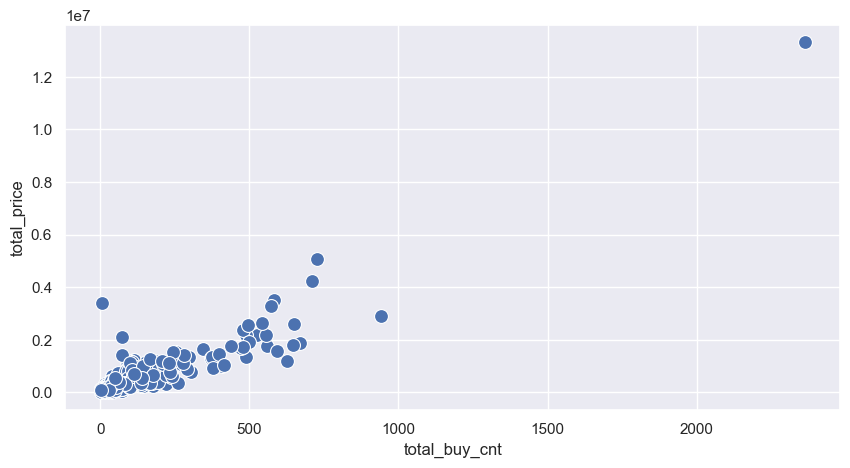

In [74]:
import seaborn as sns

sns.set(style='darkgrid',
        rc={'figure.figsize' : (10,5)})

sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=100)

In [75]:
# delete outlier

def get_outlier_mask(df, weight=1.5) :
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR  = Q3-Q1
    IQR_weight = IQR * weight
    
    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight
    
    outlier_per_column = (df < range_min) | (df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1)
    
    return is_outlier

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

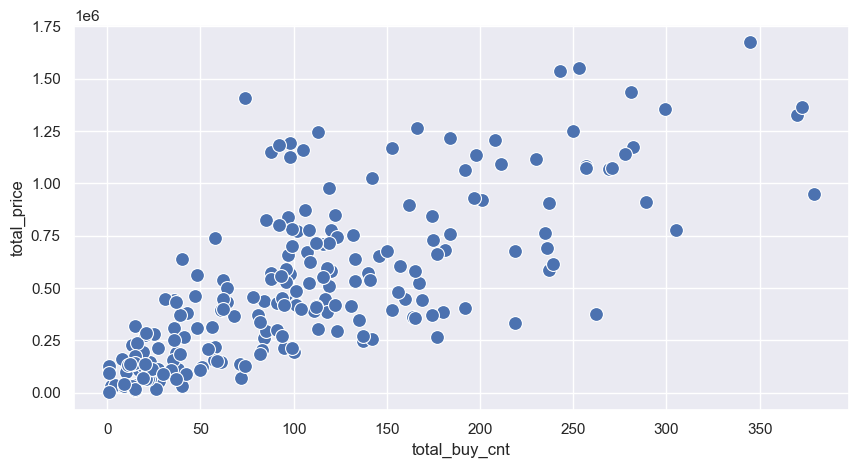

In [76]:
outlier_idx_cust_df = get_outlier_mask(sales_df)
sales_df = sales_df[~outlier_idx_cust_df]

sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=100)

In [77]:
# Standaradization (표준화)
df_mean = sales_df.mean()
df_std = sales_df.std()

scaled_df = (sales_df - df_mean) / df_std #(X-m)/표준편차

scaled_df.columns = ['total_buy_cnt', 'total_price']

scaled_df.index = sales_df.index

scaled_df

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.02
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.04
18168,1.69,2.74
18225,-1.24,-1.04


In [78]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=123)
model.fit(scaled_df)

scaled_df['label'] = model.predict(scaled_df)

scaled_df

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,total_buy_cnt,total_price,label
customer_id,,,
12395,-0.05,-0.15,0
12427,-0.07,0.21,0
12431,0.23,0.95,1
12471,-1.13,-1.02,0
12472,-0.19,0.21,0
...,...,...,...
18144,-0.89,-1.04,0
18168,1.69,2.74,1
18225,-1.24,-1.04,0


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

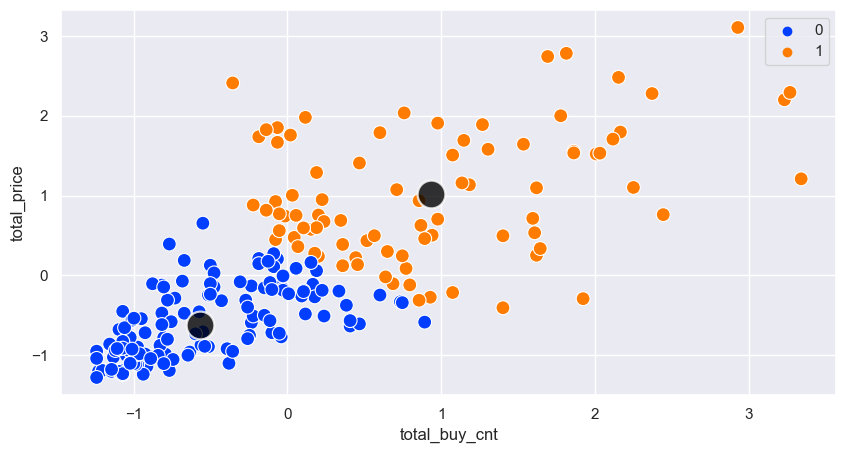

In [79]:
centers = model.cluster_centers_

sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], hue=scaled_df['label'], s=100, palette='bright')
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=400)

In [80]:
model.inertia_

187.06172815569346

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

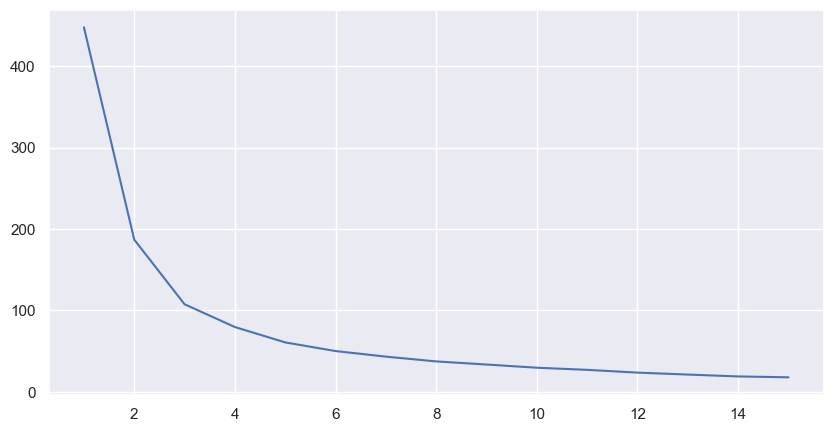

In [81]:
scaled_df = scaled_df.drop(['label'], axis=1)

inertias = []

for k in range(1, 16) : 
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)
    
sns.lineplot(x=range(1,16), y=inertias, markers='')
plt.show()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

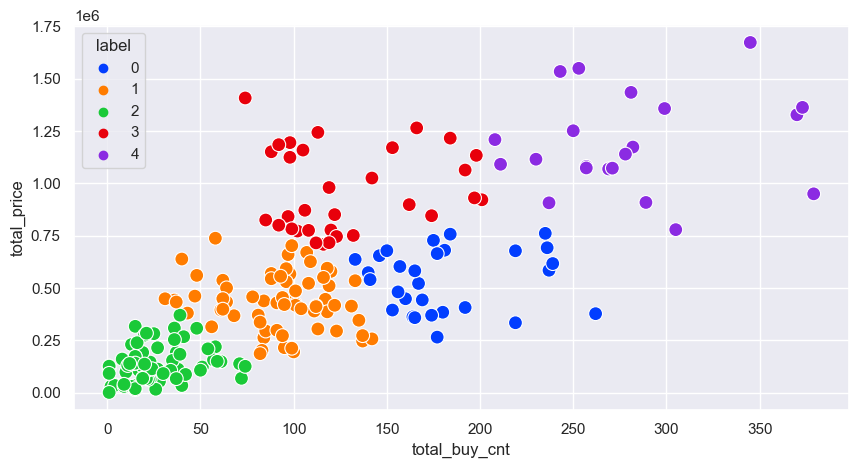

In [82]:
# 기울기의 변화가 4~6 구간에서 급격하게 줄고 있으므로, 4~6구간에서 k를 설정하는게 좋아 보임
model = KMeans(n_clusters=5, random_state=123)
model.fit(scaled_df)


centers = model.cluster_centers_
sales_df['label'] = model.predict(scaled_df)
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=100, hue=sales_df['label'], palette='bright')
# sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.3, s=400)

In [83]:
pd.DataFrame(sales_df['label'].value_counts())

,count
label,
2,77
1,66
3,32
0,29
4,21


In [84]:
groupby_df = sales_df.groupby('label').mean()
groupby_df['price_mean'] = groupby_df['total_price'] / groupby_df['total_buy_cnt']
groupby_df

,total_buy_cnt,total_price,price_mean
label,,,
0,181.14,"536,495.17","2,961.80"
1,91.79,"432,910.30","4,716.42"
2,25.64,"127,196.23","4,961.56"
3,127.78,"963,223.12","7,538.06"
4,280.33,"1,192,478.57","4,253.79"
